# $E_\text{peak} - E_\text{iso}$ correlation, introducing errors


We have searched for a $E_\text{peak}-E_\text{iso}$ fit in the [Epeak_Eiso_correlation.ipynb](https://github.com/joanalnu/oab-inaf/blob/main/Epeak_Eiso_correlation.ipnb) notebook. In this notebook, we leverage the fitting of this correlation by accounting for the errors of the variables. For the moment (09/07/2025), we will only take the y-axis error (the error on $E_\text{peak}$), since we are using the vertical residuals ($y-\text{model}$) for $\chi^2$. Anyways, we have the intention to introduce perpendicular distances measurement for $\chi^2$ and also the contribution of the x-axis ($E_\text{iso}$ error for the fit. Additionally to the previously mentioned notebook, we introduce the use of the reduced $\chi^2$, so the final equation looks like:

$$\chi^2 = \text{dof}^{-1} \sum_i \frac{ \left[E_\text{peak, i} - \left(m \times E_\text{iso, i} + k\right)\right]^2}{\sigma_\text{peak,i}}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../table.csv') # read the data from Ghirlanda et al. 2008

The first step is to take the logarithm of the data, were we must apply the correct formula for the error propagation, since we can't do:
$$\log_{10}(E\pm \sigma_E) \not = \log_{10}(E)\pm \log_{10}(\sigma_E)\text{ !!}$$

We will derive the proper logarithmic error propagation by defining a function $y(x)$, where $y$ is the logarithm of $x$ and differentiating it to obtain the propagation of the differential $dx$.
 $$
 \begin{align}
    y &= \log_{a} x\quad\text{; in our case }a=10\\
    a^y = x\\
    \frac{d}{dx} a^y &= \frac{d}{dx} x\quad\text{; since }$y=y(x)\text{ the chain rule applies}^1\\
    \ln(a)a^y\frac{dy}{dx} &= 1\quad\text{; remember }a^y = x\\
    dy &= \frac{dx}{ln(a)x} = \frac{dx}{x}\log_{a}(e)
 \end{align}
 $$

Now, by assuming that the errors, in comparison with the distances between values, are small (i.e. $dx \approx \Delta x$), we can write $\sigma_{E,\log}=\sigma_E/(E\times\ln10)$, noting that we are computing symetrical errors.

$^1$ The chain rule being $\frac{d}{dx} u(v(x) = u^\prime(v(x)) \times v^\prime(x)$.

In [2]:
Epeak = np.log10(df['Epeak']) # keV
Epeak_err = df['Epeak_err'] / (df['Epeak'] * np.log(10)) # correct error propagation

Eiso = np.log10(df['Eiso']) # ergs
Eiso_err = df['Eiso_err'] / (df['Eiso'] * np.log(10))

z = df['z']

Text(0, 0.5, '$log(E_{\\text{peak}})$')

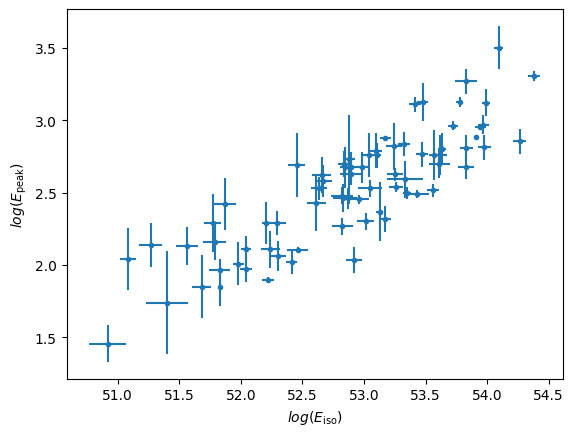

In [3]:
plt.figure()
plt.errorbar(Eiso, Epeak, xerr=Eiso_err, yerr=Epeak_err, fmt='.')
plt.xlabel(r'$log(E_{\text{iso}})$')
plt.ylabel(r'$log(E_{\text{peak}})$')

## Vertical Residuals Approach

Next, we'll go ahead with the fitting of the parameters. Remember that we want to fit the logarithm of the data to the model $E_\text{peak} = m\times E_\text{iso} + k$. But now we want to take the errors into account too. Continuing with the goodness of fit (GoF) approach, we will redefine $\chi^2$ to take the errors into account, i.e. computing a weighted fit.
$$\chi^2 = \sum_i \frac{r_i^2}{\sigma_{r,i}^2}$$,
where $r_i = E_\text{peak,i} - \left(m \times E_\text{iso,i}+k\right)$ are the residuals and $\sigma_{r,i}^2$ the variance of the residuals for $i$. Thus, we can calculate the variance of $E_\text{peak}$ by squaring the errors provided in the table. Then we divide the obtained $\chi^2$ value by the degrees of freedom (dof), being the difference of the number of points and the model's free parameters (reduced $\chi^2$).

## Perpendicular Distances approach

If instead we want to consider the contribution of $\sigma_{E_\text{iso}}$, we must take another approach for $\chi^2$, which now follows:
$$\chi^2 = \sum_i \frac{\left[d\left(E_\text{iso}, E_\text{peak}, m, k\right)\right]^2}{\sigma_{d,i}^2}$$
, where $\sigma_{d,i}^2$ is the total variances (adding the variance on both axis) for $i$, and $d\left(E_\text{iso}, E_\text{peak}, m, k\right)$ are the perpendicular distances between data points and fit line. To derive these distances, we can write the director vector of the correlation like $v = (1,m)$ and define the distance between a given point and a line as:
$$d(P, l) = \frac{|\vec{RP}\times\vec{v}|}{|\vec{v}|}$$
, where $\vec{RP}$ is the vector formed by any given point of the line (we choose $\textcolor{red}{(0,0)}$) and our data point $P=(E_\text{iso},E_\text{peak})$. Thus, by defining $\vec{RP} = (E_\text{iso}, E_\text{peak})$, its cross-product with $\vec{v}$ is equal to $mE_\text{iso} - E_\text{peak}$. Thus, making the final equation look like:
$$d\left(E_\text{iso}, E_\text{peak}, m, k\right) = \frac{aE_\text{iso}-E_\text{peak}}{\sqrt{1+a^2}}$$.

_Note to self: by was I getting $mE_\text{iso} - E_\text{peak} + b$ before? Isn't that the right equation?_

Then, we must find a way to derive the contribution of each error to the total varaince $\sigma_i^2$. We can do that by using the formula of error propagation theory defined for a function $d(x,y) = mx\textcolor{red}{+b}-y$:
$$\sigma^2 = \frac{\partial r}{\partial x} \sigma_x^2 + \frac{\partial r}{\partial y} \sigma_y^2 + \frac{\partial r}{\partial x} \frac{\partial r}{\partial y} \text{Cov}(x,y)$$

The term with the covariance matrix $(\text{Cov}(x,y))$, accounts for the correlation between the errors. For now, we'll assume that the errors are _not_ correlated, therefore drop this term $(\text{Cov}(x,y)=0)$ and proceed partially differentiating.
$$\frac{\partial r}{\partial x} = m \quad \frac{\partial r}{\partial y} = 1$$

substituting both
$$\chi^2 = \sum_i \frac{\left[d\left(E_\text{iso}, E_\text{peak}, m, k\right)\right]^2}{\sigma_{E_\text{peak}}^2+m\sigma_{E_\text{iso}} \textcolor{lightblue}{+\sigma_{extra}^2}}$$

_Still have to refine this section._

In [4]:
def reduced_chi_squared(m, k, x, y, x_err=Eiso_err, y_err=Epeak_err):
    """
    Goodness of fit following the reduced chi-squared formula with error propagation.
    :param m: slope
    :param k: y-axis cut
    :param x: x-values
    :param y: y-values
    :param x_err: uncertainties in x-values
    :param y_err: uncertainties in y-values
    :return: reduced chi-squared value
    """

    model = m*x+k
    residuals = (y - model)**2
    total_variance = y_err**2
    # total_variance = x_err**2 * something
    dof = len(x)-2
    return np.sum(residuals/total_variance)/dof
    # remember that by accounting for x_err, residuals must be perpendicular distances

In [5]:
k = np.linspace(-1.,1.,100) # using barycenter as origin of coordinates
m = np.linspace(.1,.9,100) # slope of power-law must be positive (approximated with figure)

# ensuring all data are defined as NumPy arrays
Epeak = np.array(Epeak)
Epeak_err = np.array(Epeak_err)
Eiso = np.array(Eiso)
Eiso_err = np.array(Eiso_err)

# compute the barycenter of the data and correcting the coordinates of the data points
xcm = np.sum(Eiso)/len(Eiso)
ycm = np.sum(Epeak)/len(Epeak)
Eiso_bc = Eiso-xcm
Epeak_bc = Epeak-ycm

In [6]:
G = np.zeros([len(m), len(k)])
for i in range(len(m)):
    for j in range(len(k)):
        G[i,j] = reduced_chi_squared(m[i], k[j], x=Eiso_bc, y=Epeak_bc)

# extract best fit parameters
minimum_chi_squared = np.min(G)
m_index, k_index = np.unravel_index(np.argmin(G), G.shape)
m_fit, k_fit = m[m_index], k[k_index]
print(minimum_chi_squared, m_fit, k_fit)

14.557699429381302 0.5525252525252525 -0.09090909090909083


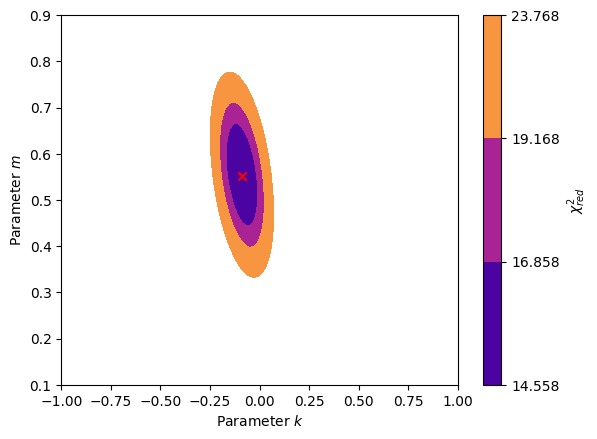

In [7]:
plt.figure()
plt.contourf(k, m, G, levels=[minimum_chi_squared, minimum_chi_squared + 2.3, minimum_chi_squared + 4.61, minimum_chi_squared + 9.21], cmap='plasma')
plt.colorbar(label=r'$\chi_{red}^2$')

plt.xlabel(r'Parameter $k$')
plt.ylabel(r'Parameter $m$')
plt.scatter(k_fit, m_fit, marker='x', c='r')

Now we can plot the best fit line over the $E_\text{peak}$-$E_\text{iso}$ data.

Text(0, 0.5, 'Epeak')

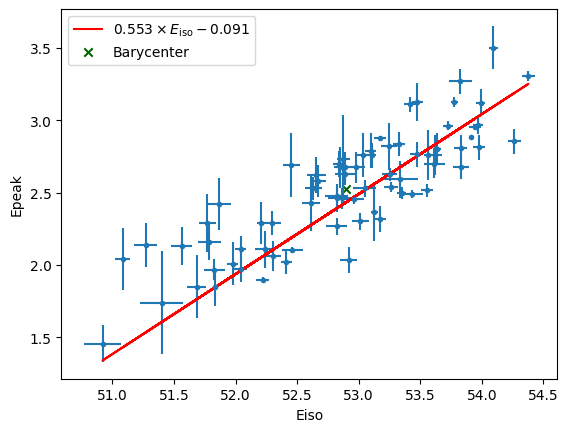

In [8]:
plt.figure()
plt.errorbar(Eiso, Epeak, xerr=Eiso_err, yerr=Epeak_err, fmt='.')
plt.plot(Eiso, ycm+k_fit+((Eiso-xcm)*m_fit), color='r', label=fr'${m_fit:.3f}\times E_\text{'{iso}'} {k_fit:.3f}$')
plt.scatter(xcm, ycm, color='darkgreen', label='Barycenter', marker='x')

plt.legend(); plt.xlabel('Eiso'); plt.ylabel('Epeak')

In [9]:
from astropy.cosmology import LambdaCDM

cosmo_standard = LambdaCDM(H0=70.0, Om0=0.3, Ode0=0.7)
standard_dL = cosmo_standard.luminosity_distance(z)

cosmo_new = LambdaCDM(H0=70.0, Om0=0.25, Ode0=1.75)
dl_new = cosmo_new.luminosity_distance(z)
Eiso_new = Eiso + np.log10((dl_new/standard_dL)**2)

if True in np.isnan(dl_new):
    print("I found it!")
print(Eiso[0:5])
print(Eiso_new[0:5])

I found it!
[52.20411998 51.78675142 53.47129171 53.32428246 51.68304704]
[52.5596045        nan        nan        nan        nan]


/Users/joanalnu/opt/anaconda3/envs/grbcosmo/lib/python3.13/site-packages/astropy/cosmology/_src/flrw/base.py:1179: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/Users/joanalnu/opt/anaconda3/envs/grbcosmo/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2623: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*args, out=...)


In [10]:
xcm = np.sum(Eiso_new)/len(Eiso_new)
Eiso_new_bc = Eiso_new-xcm

0.0 0.1 -1.0


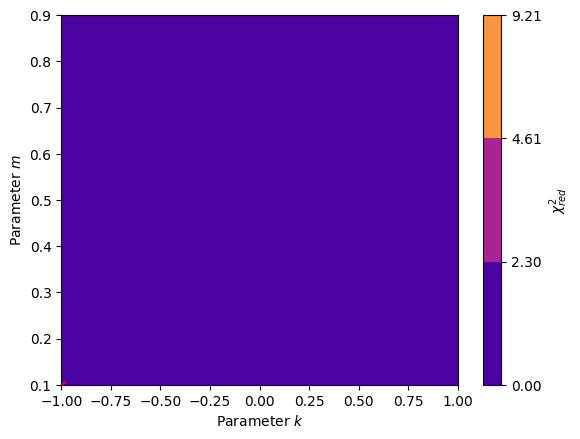

In [12]:
G = np.zeros([len(m), len(k)])
for i in range(len(m)):
    for j in range(len(k)):
        G[i, j] = reduced_chi_squared(m[i], k[j], x=Eiso_new_bc, y=Epeak_bc)

# extract best fit parameters
minimum_chi_squared = np.min(G)
m_index, k_index = np.unravel_index(np.argmin(G), G.shape)
m_fit, k_fit = m[m_index], k[k_index]
print(minimum_chi_squared, m_fit, k_fit)


# plt.figure()
plt.contourf(k, m, G, levels=[minimum_chi_squared, minimum_chi_squared + 2.3, minimum_chi_squared + 4.61,
                              minimum_chi_squared + 9.21], cmap='plasma')
plt.colorbar(label=r'$\chi_{red}^2$')

plt.xlabel(r'Parameter $k$')
plt.ylabel(r'Parameter $m$')
plt.scatter(k_fit, m_fit, marker='x', c='r')